In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 7)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'

## Import Dataset

In [3]:
# Crescent Full-Moon Dataset
dataset = np.loadtxt("dataset/crescentfullmoon.csv", delimiter=",")
np.random.shuffle(dataset)

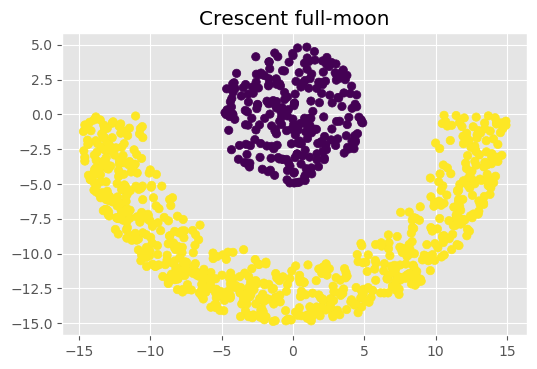

In [4]:
plt.figure(dpi = 100)
plt.scatter(dataset[:,0],dataset[:,1], c=dataset[:,2])
plt.title("Crescent full-moon")
plt.show()

## Define activation function 
### 1. ReLU 

In [5]:
def relu(x):
    z = np.zeros_like(x)
    return np.fmax(x, z)

def delta_relu(x):
    res = relu(x)
    return (res > 0).astype(int)

### 2. Softmax

In [6]:
def softmax(X):
    # Subtract max(y) for numerical stability
    X = X - np.max(X, axis=0)
    X = np.exp(X)
    return X / np.sum(X, axis=0)

### Initializing Weights $W$ and Biases $b$

In [62]:
def initialize(X, y, dims):
    # Takes a list 'dims' as input containing number of Units(Neurons) at each layer, the len(dims) gives the number of hidden layer 
    # and returns a list of "Weights" and "Biases" as a tuple
    # X shape: [batch, input_units]
    input_units = X.shape[1]
    output_units = y.shape[1]
    dims = [input_units] + dims + [output_units]
    
    # Choose random weights and biases
    params = []
    for i in range(len(dims)-1):
        # Weight shape: [input_units, output_units]
        W = np.random.random((dims[i], dims[i+1]))
        # Bias shape: [output_units, 1]
        b = np.random.random((dims[i+1], 1))
        params.append((W,b))
    return params

In [92]:
'''
W = np.array([[0.5,0.5],
              [0.5,0.5]])
b = np.ones((2,1))
'''
X = np.array([[1,2]])
y = np.array([[1], [0]])

params = initialize(X, y, [2,3])


z1 = np.dot(params[0][0], X.T) + params[0][1]
z1 = relu(z1)

z2 = np.dot(params[1][0].T, z1) + params[1][1]
z2 = relu(z2)

z3 = np.dot(params[2][0].T, z2) + params[2][1]
z3 = relu(z3)
print(z3)



[[4.12943934]]
